In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
df = pd.read_csv("readonly/adult.txt", header=None, sep=", ")
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]

<ipython-input-71-764c0c5d80fa>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("readonly/adult.txt", header=None, sep=", ")


In [72]:
df = df.replace('?', np.nan)
# Gives the count in each column with missing values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

In [73]:
#Dropping missing values
count_beforedrop = df.shape[0]
df.dropna(inplace=True)
count_afterdrop = df.shape[0]
print('Number of rows before dropping the missing values ',count_beforedrop)
print('Number of rows after removing the missing data ',count_afterdrop)

Number of rows before dropping the missing values  32561
Number of rows after removing the missing data  30162


In [74]:
#Trying to find correlation between continous varaibles. Found Nothing though
df[['age','education-num','capital-gain','capital-loss','hours-per-week']].corr()

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.043526,0.080154,0.060165,0.101599
education-num,0.043526,1.000000,0.124416,0.079646,0.152522
capital-gain,0.080154,0.124416,1.000000,-0.032229,0.080432
capital-loss,0.060165,0.079646,-0.032229,1.000000,0.052417
hours-per-week,0.101599,0.152522,0.080432,0.052417,1.000000


In [75]:
#Selecting features
#Dropping columns fnlwgt,
#education similar to education-num Merging and created new
#Marital status or relationship -Choosing one - Marital Status
# Drop Capital gains/loss ? Need inputs

df.drop(columns=['fnlwgt', 'education-num','marital-status','relationship'])

,age,workclass,education,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,Bachelors,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Tech-support,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Machine-op-inspct,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Adm-clerical,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Adm-clerical,White,Male,0,0,20,United-States,<=50K


In [76]:
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [77]:
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

In [79]:
# There are 13 different categories in education, so reduced it to 7 categories by grouping different education levels
conditions = [(df['education-num'] >= 16) ,
              (df['education-num'] >= 14) & (df['education-num'] < 16),
              (df['education-num'] == 13) ,
              (df['education-num'] >= 10) & (df['education-num'] < 13),
              (df['education-num'] == 9) ,
              (df['education-num'] >= 7) & (df['education-num'] < 9),
              (df['education-num'] < 7)]

values = ['Advanced Degree','Graduate','Undergrad','Associate degree', 'High School Grad','High School Dropout','Junior High and Elementary']
df['education_levels'] = np.select(conditions, values)
df.drop(columns=['education','education-num','fnlwgt'],inplace=True)

In [80]:
#Dividing the data based on income
df_above50 = df[df['class']=='>50K']
df_below50 = df[df['class']=='<=50K']

In [86]:
df['education_levels'].unique()


array(['Undergrad', 'High School Grad', 'High School Dropout', 'Graduate',
       'Junior High and Elementary', 'Associate degree',
       'Advanced Degree'], dtype=object)

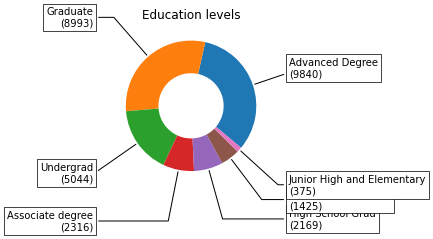

In [84]:
"""
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))


wedges, texts = ax.pie(counts_education, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    label_str = "{}\n({})".format(values[i], counts_education[i])
    ax.annotate(label_str, xy=(x, y), xytext=(1.5*np.sign(x), 1.8*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Education levels")

plt.show()
"""

In [89]:
count_education = df.groupby('education_levels').count()

Text(0.5, 1.0, 'Education distribution in salary more than 50k \n\n')

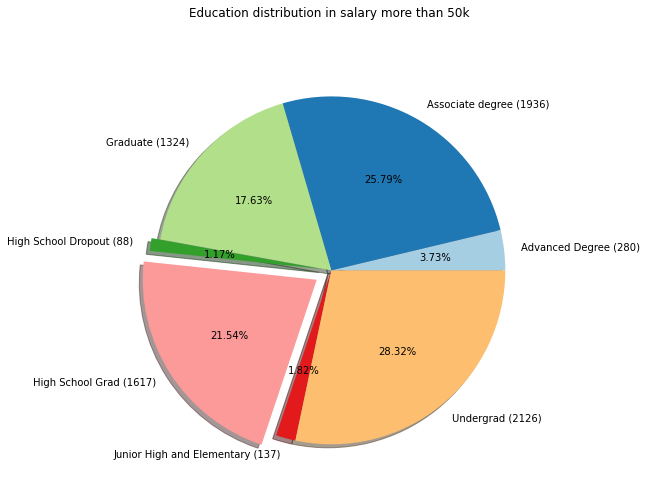

In [109]:
explode_ = (0, 0, 0, 0.05,0.1,0 ,0)
count_education = df_above50.groupby('education_levels').count()
fig = plt.figure(figsize=(20,8))
#colors_ = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#2b8cbe']
colors_pop =['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
labels_ = ["{} ({})".format(i,j) for i,j in zip(count_education.index,count_education['class']) ]
plt.pie(count_education['class'],labels=labels_,explode=explode_,colors=colors_pop, autopct='%1.2f%%',shadow=True)
plt.title('Education distribution in salary more than 50k \n\n')

Text(0.5, 1.0, 'Education distribution in salary less than 50k \n\n')

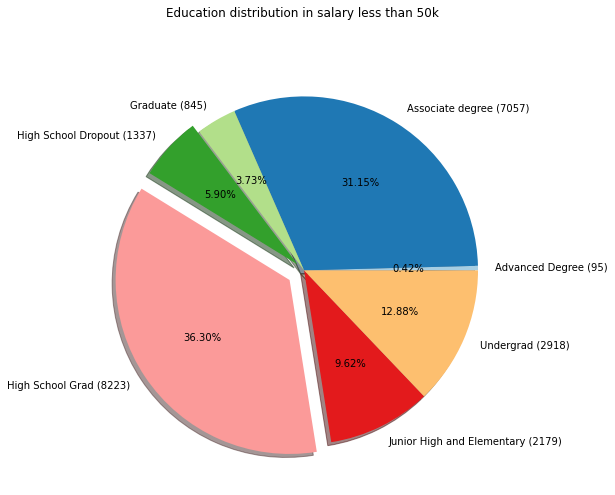

In [110]:
explode_ = (0, 0, 0, 0.05,0.1,0 ,0)
count_education = df_below50.groupby('education_levels').count()
fig = plt.figure(figsize=(20,8))
#colors_ = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#2b8cbe']
colors_pop =['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
labels_ = ["{} ({})".format(i,j) for i,j in zip(count_education.index,count_education['class']) ]
plt.pie(count_education['class'],labels=labels_,explode=explode_,colors=colors_pop, autopct='%1.2f%%',shadow=True)
plt.title('Education distribution in salary less than 50k \n\n')


Text(0.5, 1.0, 'Education distribution \n\n')

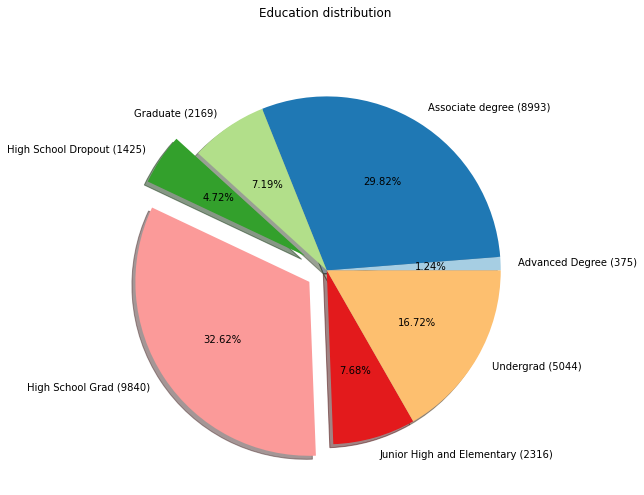

In [112]:
explode_ = (0, 0, 0, 0.15,0.12,0 ,0)
count_education = df.groupby('education_levels').count()
fig = plt.figure(figsize=(20,8))
#colors_ = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#2b8cbe']
colors_pop =['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
labels_ = ["{} ({})".format(i,j) for i,j in zip(count_education.index,count_education['class']) ]
plt.pie(count_education['class'],labels=labels_,explode=explode_,colors=colors_pop, autopct='%1.2f%%',shadow=True)
plt.title('Education distribution \n\n')
